## Qu’est-ce que l’analyse en composantes principales ?

L’analyse en composantes principales est une procédure statistique qui utilise une transformation orthogonale pour convertir un ensemble de variables corrélées en ensembles de variables non corrélées appelés composantes principales.
L’idée derrière les composantes principales est de retracer un ensemble de données sur un axe plus corrélé qui est connu sous le nom de composante principale. Ces axes sont créés par transformation orthogonale.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Loading Olivetti Dataset

In [10]:
data=np.load("data/olivetti_faces.npy")
target=np.load("data/olivetti_faces_target.npy")

In [11]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [12]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


## Show 48 Disticnt People in the Olivetti Dataset

In [8]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

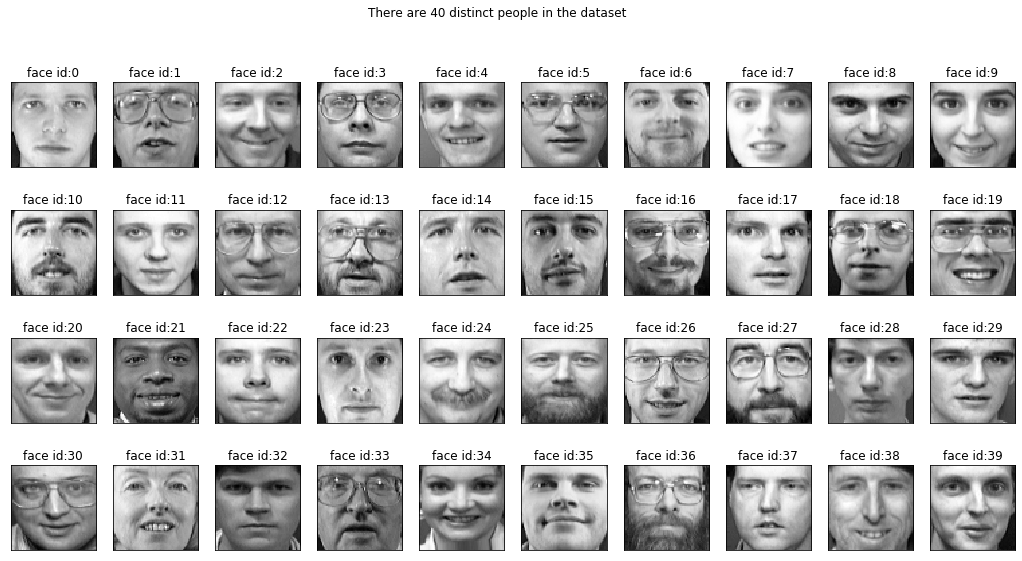

In [15]:
show_40_distinct_people(data, np.unique(target))

## Show 10 Face Images of Selected Target

In [17]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

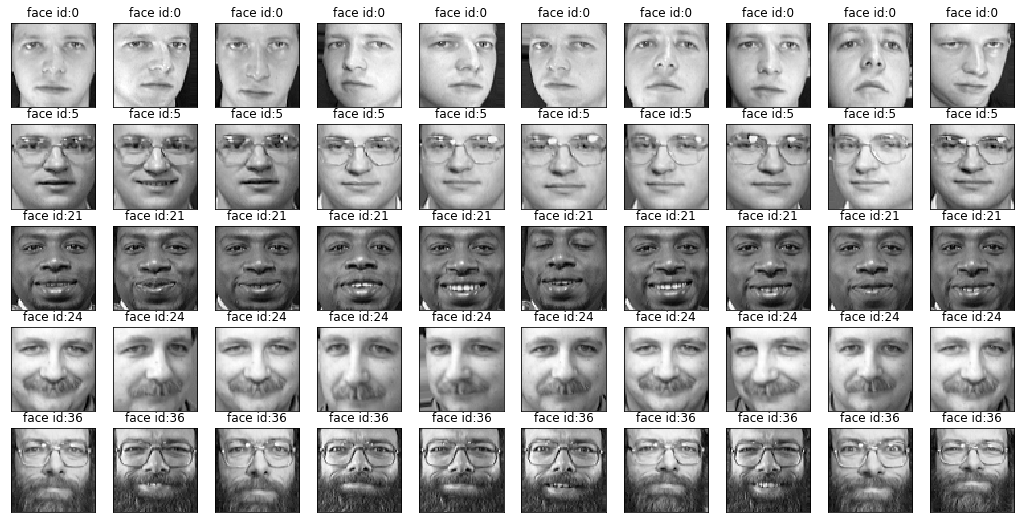

In [18]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

## Show Average Face

### voici notre face moyenne de toutes les faces du jeu de données. Nous essayons de trouver les caractéristiques qui rendent les individus différents des autres.

In [35]:
average_face = data.mean(axis = 0)

Text(0.5, 1.0, 'Average Face')

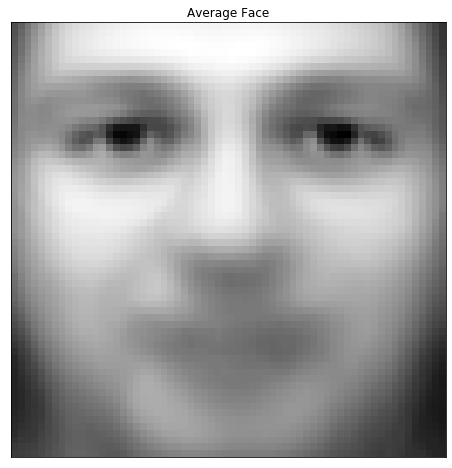

In [23]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(average_face, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

## Show Eigen Faces

### l'étape suivante consiste à définir l'ACP. Ses arguments sont X qui est des vecteurs d'images et n_pc qui est le nombre de composants principaux. Pour rappel, les composants principaux définissent une base orthonormée qui peut extraire la variance maximale dans les données d'origine. Ensuite, nous trouvons la moyenne et la soustrayons de nos données pour la centrer autour de l'origine. Après cela, nous devons effectuer une décomposition en valeurs singulières sur les données centrées pour trouver ces composants principaux appelés faces propres.

In [56]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

In [57]:
n_samples, h, w = data.shape

Text(0.5, 0.98, 'All Eigen Faces')

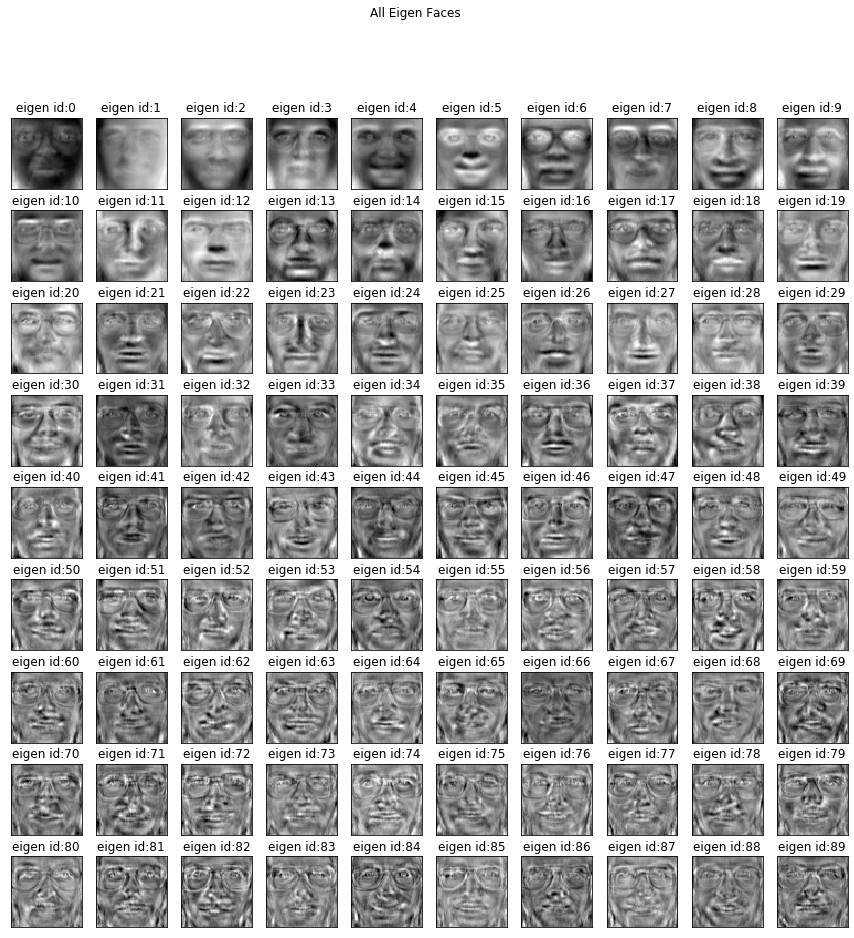

In [64]:
n_components = 90
X = data.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)

number_of_eigenfaces=n_components
eigen_faces=C.reshape((number_of_eigenfaces, h, w))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

### Pour la reconstruction, nous utiliserons ces eigenfaces. Chaque visage est une combinaison pondérée de ces eigenfaces comme vous pourriez le dire. Pour trouver des poids, nous devons multiplier par points nos données centrées et nos eigenfaces. Ensuite, nous devons pondérer les faces propres qui nous donnent la face centrée et l'ajouter à nouveau à la face moyenne. Après tout, nous sommes prêts à jeter un œil aux visages récupérés par rapport aux visages originaux.

In [72]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(data))]

Text(0.5, 0.98, 'All Recovered Faces')

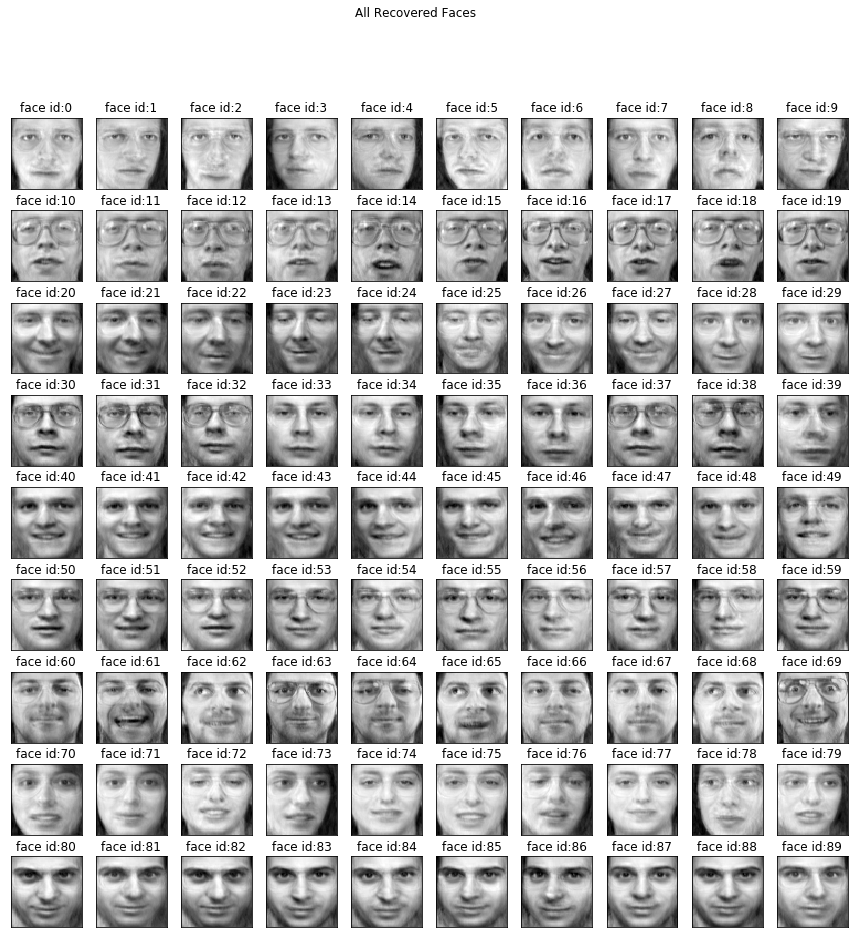

In [73]:
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(recovered_images[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("face id:{}".format(i))
plt.suptitle("All Recovered Faces".format(10*"=", 10*"="))

# Réalisé par Moad Boulahdoud

##### Stay Home xD